In [8]:
import sys
print("Python Version:", sys.version)
import statistics
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
sns.set()


import datetime
import re
import string
import nltk
import sklearn
from nltk.tokenize import MWETokenizer 
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans


    #py file in directory
from py_files.cleaner import mr_clean_and_tokenize
from py_files.vectorizer import Vectorizer_I_Hardly_Know_Her


pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings('ignore')

Python Version: 3.8.6 | packaged by conda-forge | (default, Oct  7 2020, 18:42:56) 
[Clang 10.0.1 ]


## The Setup

For this Natural Language Processing project, we will be disecting the tweets of Donald J. Trump. From TheTrumpArchive, we have every tweet President Trump has ever sent, and we will be sticking to his tweets while in office.

In [2]:
#############################################################
#Data graciously taken from https://www.thetrumparchive.com/#
#############################################################
df_tweets = pd.read_csv('tweet_data/trump_tweets_raw.csv')
pd.to_datetime(df_tweets['date'])
df_tweets.sort_values('date',ascending = False, inplace = True,ignore_index = True)
df_tweets=df_tweets.rename(columns = {'date':'DateTime'})
df_tweets['DateTime'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in df_tweets["DateTime"]]
df_tweets['Date'] = [datetime.datetime.date(d) for d in df_tweets['DateTime']] 
df_tweets['Time'] = [datetime.datetime.time(d) for d in df_tweets['DateTime']] 
#The Day trump became president
mask = (df_tweets['Date'] >= datetime.date(2017, 1, 20))
df_trump = df_tweets[mask]
len(df_trump)

24110

This function found in py_files/cleaner cleans the tweets and then tokenizes them. It is the first step before we put the text into a count vectorizer. 

In [3]:
df_trump['tokenized_text'] = df_trump['text'].apply(mr_clean_and_tokenize)
df_trump.head()

id                                               text  \
0  1320096006038380544    Just landed in Ohio. See you in a little while!   
1  1320095628546899968  Nobody is showing up for Obama’s hate laced sp...   
2  1320076630065373184                                     AMERICA FIRST!   
3  1320076502839459842                          MAKE AMERICA GREAT AGAIN!   
4  1320076289034850306  Joe Biden = Biggest Tax Increase In History an...   

  isRetweet isDeleted              device  favorites  retweets  \
0         f         f  Twitter for iPhone      37662      4948   
1         f         f  Twitter for iPhone      57061     10961   
2         f         f  Twitter for iPhone      89661     14937   
3         f         f  Twitter for iPhone     152417     24873   
4         f         f  Twitter for iPhone      57012     11744   

             DateTime        Date      Time  \
0 2020-10-24 20:13:08  2020-10-24  20:13:08   
1 2020-10-24 20:11:38  2020-10-24  20:11:38   
2 2020-10-24 18:56:09  2020-10-24  18:56:09   
3 2020-10-24 18:55:38  2020-10-24  18:55:38   
4 2020-10-24 18:54:47  2020-10-24  18:54:47   

                                      tokenized_text  
0                        [landed, ohio, see, little]  
1  [nobody, showing, obama, hate, laced, speeches...  
2                                    [america_first]  
3                         [make_america_great_again]  
4  [joe, biden, biggest, tax, increase, history, ...

Now we can create a count vectorizer from the tokenized column. This function also filters out sparse words by creating a threshhold limit. Right now the function designates the limit to be 15 times. 

In [4]:
#Now we can create a count vectorizer from the tokenized column.  #
#This function also filters out sparse words                      #
#Right now the function says a word has to appear 15 times atleast#
###################################################################

df_vectorized = Vectorizer_I_Hardly_Know_Her(df_trump['tokenized_text'])
df_vectorized.head(10)

abc  abe  abeshinzo  able  abolish  absentee  absolute  absolutely  abuse  \
0    0    0          0     0        0         0         0           0      0   
1    0    0          0     0        0         0         0           0      0   
2    0    0          0     0        0         0         0           0      0   
3    0    0          0     0        0         0         0           0      0   
4    0    0          0     0        0         0         0           0      0   
5    0    0          0     0        0         0         0           0      0   
6    0    0          0     0        0         0         0           0      0   
7    0    0          0     0        0         0         0           0      0   
8    0    0          0     0        0         0         0           0      0   
9    0    0          0     0        0         0         0           0      0   

   accept  ...  years  yes  yesterday  yet  york  young  zelensky  zero  zone  \
0       0  ...      0    0          0    0     0      0         0     0     0   
1       0  ...      0    0          0    0     0      0         0     0     0   
2       0  ...      0    0          0    0     0      0         0     0     0   
3       0  ...      0    0          0    0     0      0         0     0     0   
4       0  ...      0    0          0    0     0      0         0     0     0   
5       0  ...      0    0          0    0     0      0         0     0     0   
6       0  ...      1    0          0    0     0      0         0     0     0   
7       0  ...      0    0          0    0     0      0         0     0     0   
8       0  ...      0    0          0    0     0      0         0     0     0   
9       0  ...      0    0          0    0     0      0         0     0     0   

   zones  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0  
9      0  

[10 rows x 2857 columns]

## Analysis

In [32]:
#Let's check out some PCA analysis that is easy to visualize
#Start with just 2 components for a 2-d graph
pca_viz = PCA(n_components=2)
pca_viz.fit(df_vectorized)
pca_viz_df = pd.DataFrame(pca.transform(df_vectorized))

In [6]:
# #F or some reason this is making my computer very slow - Saved in Directory
# plt.scatter(pca_viz_df[0],pca_viz_df[1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('First PCA Analysis')
# plt.savefig('2components.png');

In [9]:
#Unfortunately this few components don't seem to be explaining much variance.
pca_viz.explained_variance_ratio_.sum()

0.03269642720967421

Let's do some cluster analysis. First we are going to try to find a good ammount of principal cocmponents to use. This is a wide range below.

Text(0, 0.5, 'Explained Variance')

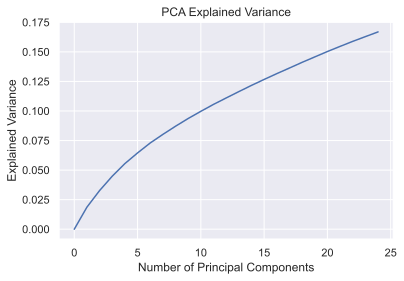

In [13]:
#Put them in a list
explained_variance = []
for i in range(25):
    pca = PCA(n_components=i)
    pca.fit(df_vectorized)
    explained_variance.append(pca.explained_variance_ratio_.sum())
plt.plot([i for i in range(25)],explained_variance)
plt.title('PCA Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')

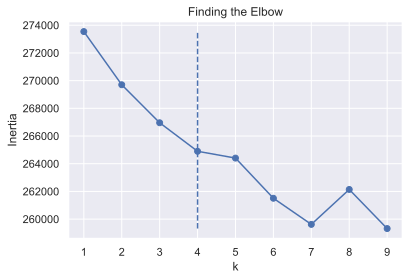

In [26]:
inertias = []
for k_ in np.arange(1, 10):
    km = KMeans(n_clusters=k_)
    km.fit(df_vectorized)
    inertias.append(km.inertia_)

plt.plot(np.arange(1, 10), inertias, marker='o')
plt.vlines(x=4, ymin=min(inertias), ymax=max(inertias), ls='--', label='Elbow')
plt.ylabel("Inertia")
plt.xlabel('k')
plt.title('Finding the Elbow')
plt.savefig('kmeanselbow.png');

In [51]:
#Lets look at the four clusters
km = KMeans(n_clusters=2)
km.fit(df_vectorized)

KMeans(n_clusters=2)

In [52]:
labels = km.labels_
x = pca_viz_df[0]
y = pca_viz_df[1]
color = 'brgcmyk'
label_color = [color[l] for l in labels]
plt.scatter(x, y, c=label_color)
plt.title('2-PCA, 2 Clusters');